In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [259]:
data = pd.read_csv('../raw_data/final_dataset_2.csv')

/tmp/ipykernel_7169/2566783622.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../raw_data/final_dataset_2.csv')


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574057 entries, 0 to 574056
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 574057 non-null  object 
 1   name               574057 non-null  object 
 2   popularity         574057 non-null  int64  
 3   duration_ms        574057 non-null  int64  
 4   explicit           574057 non-null  int64  
 5   artists            574057 non-null  object 
 6   release_date       574057 non-null  object 
 7   danceability       574057 non-null  float64
 8   energy             574057 non-null  float64
 9   key                574057 non-null  int64  
 10  loudness           574057 non-null  float64
 11  mode               574057 non-null  int64  
 12  speechiness        574057 non-null  float64
 13  acousticness       574057 non-null  float64
 14  instrumentalness   574057 non-null  float64
 15  liveness           574057 non-null  float64
 16  va

In [261]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,id_artists,followers,genres,artist_popularity,preview_url,cover_album
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,1922-02-22,0.645,0.44500,0,...,0.744,0.1510,0.127,104.851,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,Uli,1922-02-22,0.298,0.46000,1,...,0.856,0.4360,0.402,87.921,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,Uli,1922-02-22,0.634,0.00399,5,...,0.919,0.1050,0.396,79.895,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,Uli,1922-02-22,0.657,0.32500,10,...,0.856,0.0931,0.105,81.944,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,Uli,1922-02-22,0.644,0.68400,7,...,0.802,0.0847,0.138,100.031,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN


In [262]:
data['release_date'] = pd.to_datetime(data['release_date'], format = '%Y-%m-%d') #.dt.date

In [263]:
data['release_date']

0        1922-02-22
1        1922-02-22
2        1922-02-22
3        1922-02-22
4        1922-02-22
            ...    
574052   2022-07-19
574053   2022-08-26
574054   2022-07-01
574055   2022-05-06
574056   2022-06-03
Name: release_date, Length: 574057, dtype: datetime64[ns]

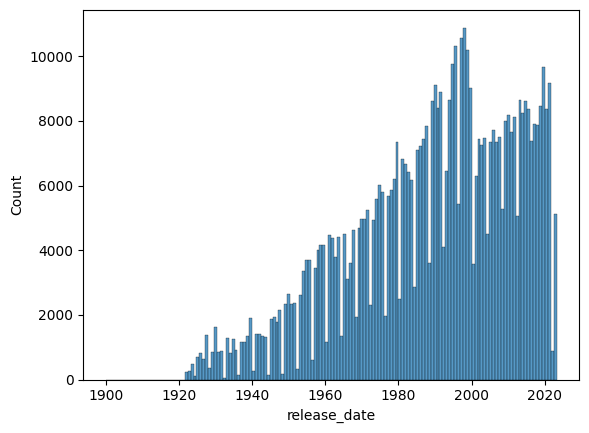

In [264]:
sns.histplot(data['release_date'])
plt.show()

In [265]:
data['delta_days'] = pd.Timestamp.today() - data['release_date']
data['delta_days'] = data['delta_days'].apply(lambda x: x.days)
data['delta_days']

0         36924
1         36924
2         36924
3         36924
4         36924
          ...  
574052      252
574053      214
574054      270
574055      326
574056      298
Name: delta_days, Length: 574057, dtype: int64

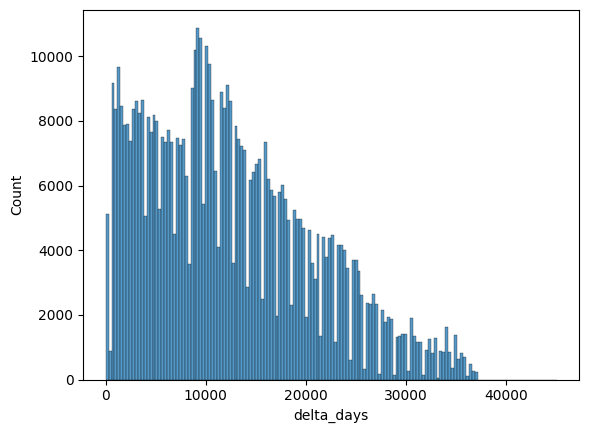

In [266]:
sns.histplot(data['delta_days'])
plt.show()

/tmp/ipykernel_7169/3042985305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loudness'][data['loudness'] > 0] = 0


<Axes: >

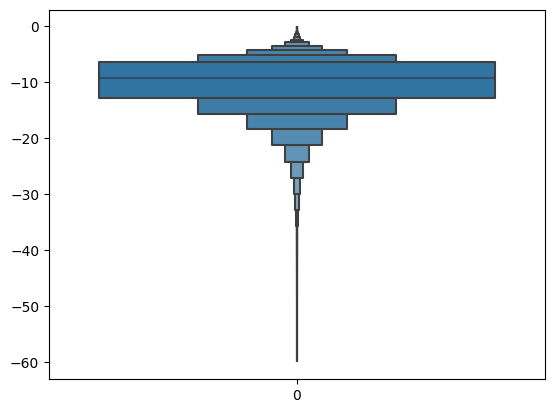

In [267]:
data['loudness'][data['loudness'] > 0] = 0
sns.boxenplot(data['loudness'])

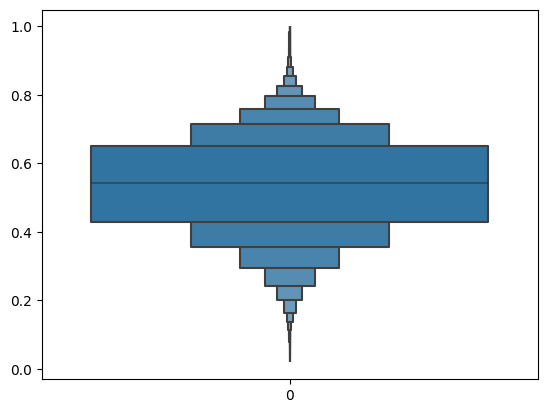

In [268]:
# Normalize the loudness to a balanced distribution
data['loudness_norm'] = np.exp(1 + data['loudness']/15)/np.e
sns.boxenplot(data['loudness_norm'])
plt.show()

/tmp/ipykernel_7169/3697978375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] > 200] = 200
/tmp/ipykernel_7169/3697978375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] < 50] = 50


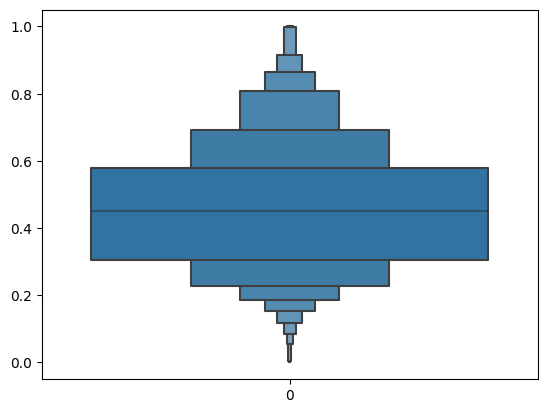

In [269]:
# normalize tempo
# 0 slowest - 1 fastest
data['tempo'][data['tempo'] > 200] = 200
data['tempo'][data['tempo'] < 50] = 50
data['tempo_norm'] = (data['tempo'] - 50)/150
sns.boxenplot(data['tempo_norm'])
plt.show()

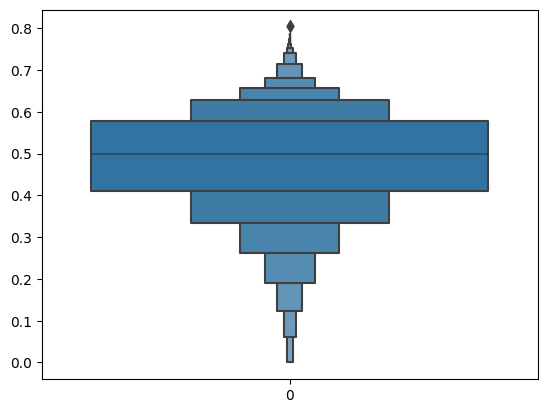

In [270]:
#normalize followers
data['followers'] = data['followers'].fillna(0)
data['followers_norm'] = np.log10(data['followers']+1)/10
sns.boxenplot(data['followers_norm'])
plt.show()

/tmp/ipykernel_7169/395983464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'][data['duration_ms']>1000000] = 1000000


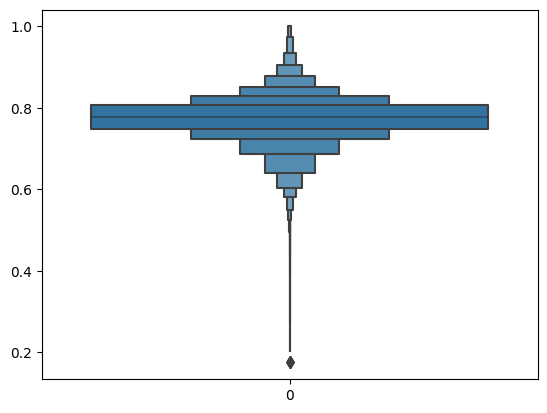

In [271]:
#normalize duration
data['duration_ms'][data['duration_ms']>1000000] = 1000000
data['duration_norm'] = np.log10(data['duration_ms']/1000000)/3+1
sns.boxenplot(data['duration_norm'])
plt.show()


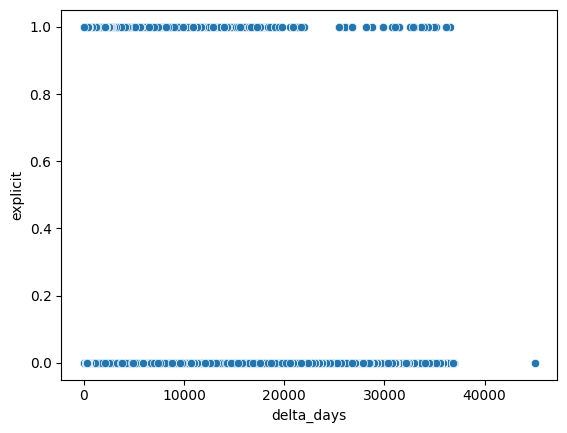

In [272]:
data['explicit'] = data['explicit'].fillna(0)
sns.scatterplot(x= data['delta_days'], y=data['explicit'])
plt.show()

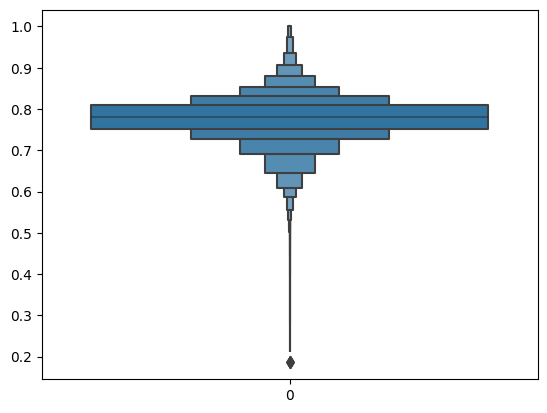

(3344, 1000000)

In [273]:
#normalize duration
data['duration_norm'] = 1+np.log(data['duration_ms']/1000000)/7
sns.boxenplot(data['duration_norm'])
plt.show()
min(data['duration_ms']), max(data['duration_ms'])

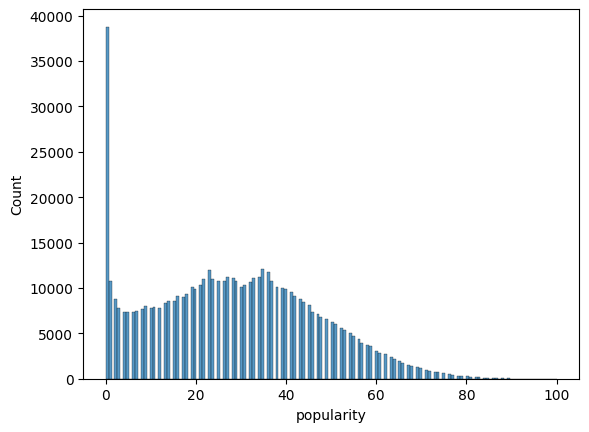

In [275]:
sns.histplot(data['popularity'])
plt.show()

In [276]:
#normalize popularity scores from 0-100 to 0-1
data['track_popularity'] = data['popularity']/100
data['artist_popularity'] = data['artist_popularity']/100

In [278]:
new_data_numeric = data.select_dtypes(exclude=['object', 'datetime64[ns]'])
new_data_numeric = new_data_numeric.drop(columns=['popularity', 'key', 
                                                  'mode', 'loudness', 'tempo', 'followers', 'duration_ms'])
new_data_numeric.dtypes

explicit               int64
danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
artist_popularity    float64
delta_days             int64
loudness_norm        float64
tempo_norm           float64
followers_norm       float64
duration_norm        float64
track_popularity     float64
dtype: object

In [279]:
new_data_numeric = new_data_numeric.fillna(0)
new_data_numeric.shape

(574057, 15)

In [280]:
new_data_numeric.describe()

,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,artist_popularity,delta_days,loudness_norm,tempo_norm,followers_norm,duration_norm,track_popularity
count,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000,574057.000000
mean,0.046241,0.562339,0.546479,0.094990,0.447135,0.111577,0.213113,0.552495,0.508261,12390.952052,0.537036,0.457792,0.484655,0.777931,0.282067
std,0.210007,0.166070,0.250127,0.155796,0.348846,0.264458,0.184213,0.257897,0.198141,8296.348717,0.152492,0.196778,0.132494,0.058031,0.183491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.018316,0.000000,0.000000,0.185630,0.000000
25%,0.000000,0.451000,0.354000,0.033900,0.095200,0.000000,0.098000,0.345000,0.380000,5565.000000,0.429157,0.305813,0.411398,0.752035,0.140000
50%,0.000000,0.575000,0.555000,0.043900,0.415000,0.000026,0.138000,0.564000,0.520000,11043.000000,0.544040,0.450880,0.499574,0.780616,0.280000
75%,0.000000,0.684000,0.750000,0.074000,0.782000,0.009230,0.276000,0.770000,0.650000,17740.000000,0.651594,0.577607,0.578750,0.809706,0.410000
max,1.000000,0.991000,1.000000,0.970000,0.996000,1.000000,1.000000,1.000000,1.000000,45011.000000,1.000000,1.000000,0.804379,1.000000,1.000000


In [281]:
corr = new_data_numeric.corr()
corr['track_popularity'][np.absolute(corr['track_popularity'])>0.00].sort_values(ascending = False)

track_popularity     1.000000
artist_popularity    0.522351
followers_norm       0.464494
loudness_norm        0.345885
energy               0.302834
explicit             0.221673
danceability         0.204099
duration_norm        0.110317
tempo_norm           0.070635
speechiness          0.004228
valence             -0.000155
liveness            -0.049823
instrumentalness    -0.241290
acousticness        -0.381561
delta_days          -0.606400
Name: track_popularity, dtype: float64

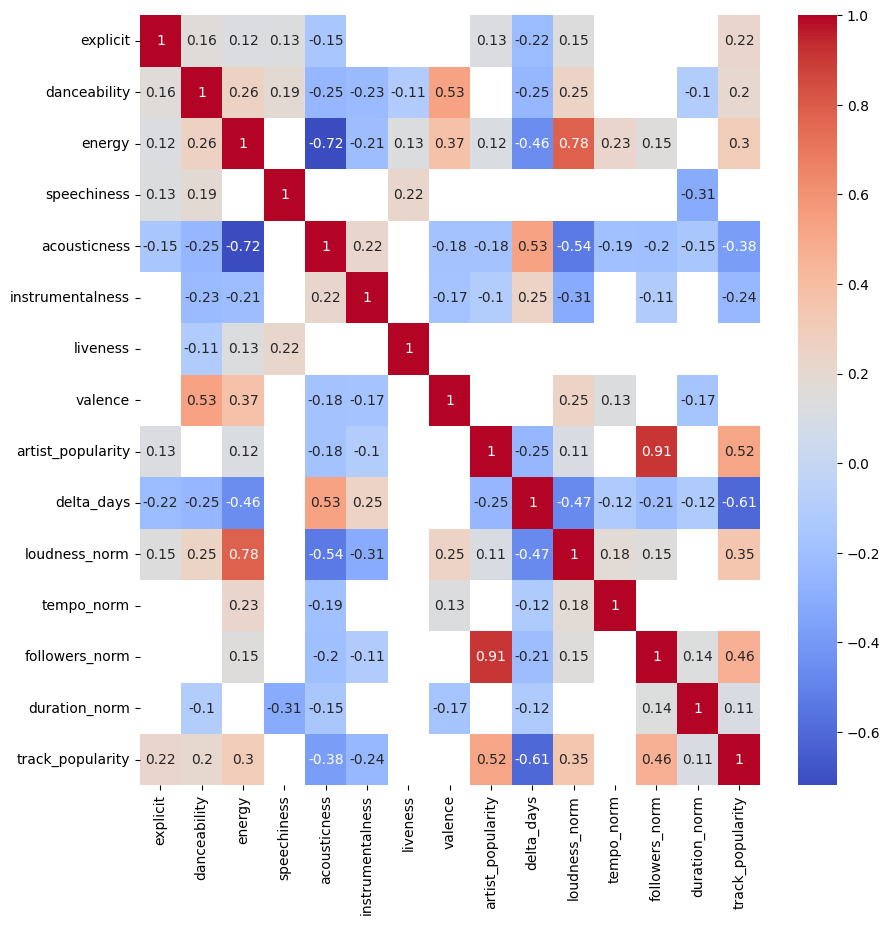

In [282]:
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

In [283]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [284]:
X = new_data_numeric.drop(['track_popularity'], axis = 1)
y = new_data_numeric['track_popularity']

In [285]:
lin_reg = LinearRegression().fit(X, y)
lin_reg.score(X, y)

0.541672464378913

In [287]:
xgb_reg = XGBRegressor()
parameters = {
    'random_state': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'gamma': [0], #default: 0
    'n_estimators': [150, 250, 350],
    'learning_rate': [0.05], #default: 0.3
    'colsample_bytree': [0.6], #default: 1
    'subsample': [1], #default: 1
    'max_depth': [10], #default: 6
    'min_child_weight': [1, 2], #default: 1
    'eval_metric': ['rmsle']
    }

### optional to enable CUDA accelerated training
#import torch
#if torch.cuda.device_count() > 0:
#   parameters['tree_method'] = ['gpu_hist']
#   print('CUDA-GPU accelerated tra

In [288]:
clf = GridSearchCV(xgb_reg, parameters, n_jobs=-1)
clf.fit(X, y)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.6,
  'eval_metric': 'rmsle',
  'gamma': 0,
  'learning_rate': 0.05,
  'max_depth': 10,
  'min_child_weight': 1,
  'n_estimators': 350,
  'random_state': 0,
  'reg_alpha': 0,
  'reg_lambda': 1,
  'subsample': 1},
 0.40722270588381215)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [290]:
# initialize new XGBRegressor with best parameters from grid search on small dataset
xgb_reg = clf.best_estimator_

# fit on the full dataset
xgb_reg = xgb_reg.fit(X_train, y_train, verbose=False)

# Predict against the test set
xgb_pred = xgb_reg.predict(X_test)
    
# Score    
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)
print("Root Mean Squared Error for XGBoost Regressor:", round(rmse_xgb, 3))
r2_xgb = r2_score(y_test, xgb_pred)
print("R2 Score for XGBoost Regressor:", round(r2_xgb, 3))

Root Mean Squared Error for XGBoost Regressor: 0.098
R2 Score for XGBoost Regressor: 0.716


In [291]:
#Save the model
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_reg, open(file_name, "wb"))